# Sample Python Programs 1

In [ ]:
# --------------
# Simple program for computing the sample mean
#    of a list of integers
#
# define the list of numbers
Numbers = [123, 87, 96, 24, 104, 16, 55, 24, 19, 86, 776, 1945]
# running total
Total = 0
# count of the number of items
Count = 0
# for each item in the list
for Num in Numbers:
    # increment the total
    Total = Total + Num
    # increment the count
    Count=Count+1
# compute the sample average
if Count > 0 :
    Average = float(Total)/Count
else :
    Average = "Can't compute the average of a sample of size 0."
# display output
print ("Average of the {:} numbers = {:.3f}".format(Count, Average))


In [ ]:
#
# Python-esque version for sample mean
# 
Numbers = [123, 87, 96, 24, 104, 16, 55, 24, 19, 86, 776, 1945]
print ("Average of the {:} numbers = {:.3f}".format(len(Numbers), sum(Numbers)/len(Numbers)))

In [ ]:
# -------------------------------------
# Reads a file consisting of 
#   integers (1 integer on each line) and
#   counts the number of occurances of 
#   each value (a histogram)
# -------------------------------------
# read the values
vals = [int(i.rstrip()) for i in open('..\data\data.txt','r') if i.rstrip()]
# dictionary to hold the counts - need to initialize to 0
hist = {}
for i in range(min(vals), max(vals)+1):
    hist[i] = 0
# loop through each observation
for v in vals:
    # key = integer, value = count (increment for each obs)
    hist[v] = hist[v]+1
# display
for key in sorted(list(hist)):
    print ("{:3d} : {}".format(key, hist[key]))


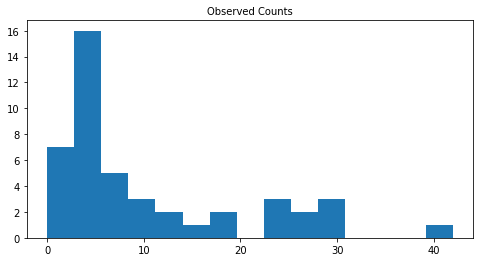

In [33]:
#
# Use count() rather than incrementing and plot using matplotlib
#
%matplotlib inline
import matplotlib.pyplot as plt

# read the values
vals = [int(i.rstrip()) for i in open('..\data\data.txt','r') if i.rstrip()]
# dictionary to hold the counts
hist = {}
# loop through each unique value
for i in range(min(vals),max(vals)+1):
    # key = integer, value = count
    hist[i] = vals.count(i)
# Graphical version
plt.figure(1, figsize=(8,4))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.hist(vals, bins=15, normed=False)
plt.title('Observed Counts',fontsize=10)
plt.show()


In [37]:
#
# quiksort - Implementaion of the quick sort algorithm.  Quicksort uses a 
#   partitioning approach with recursion.
#
#   By: Jeff Smith (2015-10-19)
#   Based on: 
#      http://stackoverflow.com/questions/18262306/quick-sort-with-python

# thelist should be a list of numbers
def quicksort(thelist):
    less = []
    equal = []
    greater = []

    if len(thelist) > 1:
        pivot = thelist[0]
        for x in thelist:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            else:
                greater.append(x)
        # Don't forget to return something!
        # Just use the + operator to join lists
        return quicksort(less) + equal + quicksort(greater)  
    # Note that you want equal   ^^^^^   not pivot
    else:  
        # You need to handle the part at the end of the recursion - when you 
        # only have one element in your thelist, just return the thelist.
        return thelist

print(quicksort([12,4,5,7,6,3,1,15,25]))


[1, 3, 4, 5, 6, 7, 12, 15, 25]


In [38]:
quicksort([1, 8, 333, 2, 19, 5, 94, 12, 652, 19, 976, 423, 1854, 96])

[1, 2, 5, 8, 12, 19, 19, 94, 96, 333, 423, 652, 976, 1854]

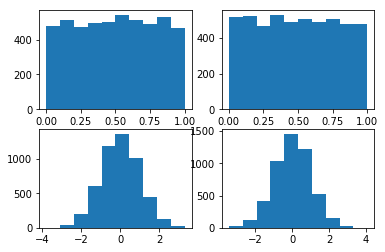

In [42]:
#
# box_muller - implementatoin of the Box-Muller method
# for generating normally distributed random variates.
#
# Adapted from https://glowingpython.blogspot.com/2013/01/box-muller-transformation.html
#
# 08/23/2017 - Jeff Smith
#
%matplotlib inline
from numpy import random, sqrt, log, sin, cos, pi
import matplotlib.pyplot as plt;

# transformation function
def gaussian(u1,u2):
    z1 = sqrt(-2*log(u1))*cos(2*pi*u2)
    z2 = sqrt(-2*log(u1))*sin(2*pi*u2)
    return z1,z2

# uniformly distributed values between 0 and 1
u1 = random.rand(5000)
u2 = random.rand(5000)

# run the transformation
z1,z2 = gaussian(u1,u2)

# plotting the values before and after the transformation
plt.figure()
plt.subplot(221) # the first row of graphs
plt.hist(u1)     # contains the histograms of u1 and u2 
plt.subplot(222)
plt.hist(u2)
plt.subplot(223) # the second contains
plt.hist(z1)     # the histograms of z1 and z2
plt.subplot(224)
plt.hist(z2)
plt.show()